# DMW Course Project

## Group Members:

```
IIT2018176 - Milan Bhuva
IIT2018178 - Manav Agrawal
IIT2018179 - Mohammed Aadil
```

------

### Header files

In [1]:
# our utils file
import utils
from models import VGG, ResNet, EffNetB3

# basic ML
import os
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# connect to drive
from google.colab import drive

# Sklearn
from sklearn.model_selection import train_test_split
from sklearn.decomposition import PCA
from sklearn import svm
from sklearn.metrics import confusion_matrix

### Mounting G-Drive

In [2]:
drive.mount('/content/gdrive')
pkldest = '/content/gdrive/MyDrive/COVID_pkls/'

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


# Model 1 - Multi Modality Fusion Model

<img src="https://user-images.githubusercontent.com/66634743/113685129-f99e4900-96d6-11eb-985b-e477cdc3074b.png" height=400 width=800>


**1)  [VGG-16](#scrollTo=-J2VaaXl-puZ)**<br/>
**2)  [ResNet-50](#scrollTo=yoaXkLst0vxa)**<br/>
**3)  [EffecientNet-V3](#scrollTo=9CGehUvs0u_p)**<br/>
**4)  [Fusion](#scrollTo=Qfl5gZAn23fO)**<br/>

------
## VGG 16

<img src="https://user-images.githubusercontent.com/66634743/113575262-a8d31580-962e-11eb-840a-83f18c2029e3.png" height=150 width=600>


### Loading features from pkl file

In [3]:
merged_features = utils.load_from_pkl(pkldest+"vgg16_merged_features.pkl")

merged_labels = utils.load_from_pkl(pkldest+"merged_labels.pkl")

### PCA (k = 256)

In [4]:
pca = PCA(n_components=256)

pca.fit(merged_features)
PCA_features = pca.transform(merged_features)

print("Shape after PCA ", PCA_features.shape)

Shape after PCA  (9544, 256)


### Classifier

In [5]:
merged_labels = merged_labels.reshape(merged_labels.shape[0])
X_train, X_test, y_train, y_test = train_test_split(PCA_features, merged_labels, test_size=0.3, random_state=42)

classifier = svm.SVC(kernel='rbf', probability=True)

classifier.fit(X_train, y_train)

SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='rbf',
    max_iter=-1, probability=True, random_state=None, shrinking=True, tol=0.001,
    verbose=False)

### Temp Results

In [6]:
pred = classifier.predict(X_test)

acc = np.sum(1*(pred==y_test))/y_test.shape[0]
print("VGG + SVM  = ", acc*100)

VGG + SVM  =  92.73743016759776


### Prababilities of classes

In [7]:
vgg16_probs = classifier.predict_proba(X_test)

print(vgg16_probs.shape)

(2864, 2)


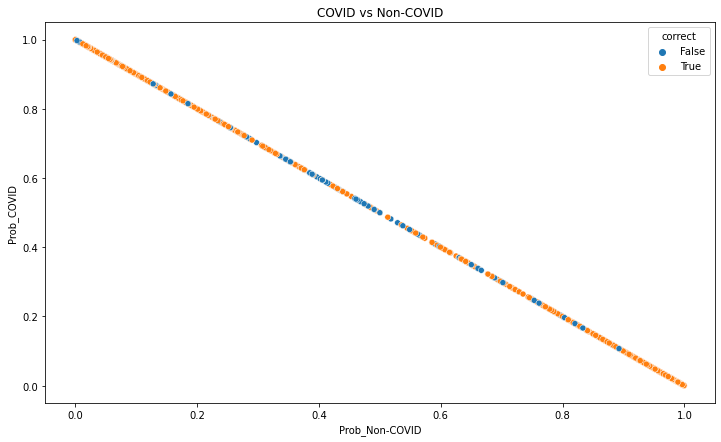

In [8]:
df = pd.DataFrame(vgg16_probs, range(vgg16_probs.shape[0]), ["Prob_Non-COVID", "Prob_COVID"])
df.insert(2, "prediction", pred, True)
df.insert(3, "actual", y_test, True)
df.insert(4, "correct", pred==y_test, True)

plt.figure(figsize=(12, 7))
sns.scatterplot(data=df, x="Prob_Non-COVID", y="Prob_COVID", hue="correct")
plt.title('COVID vs Non-COVID')
plt.show()

[]

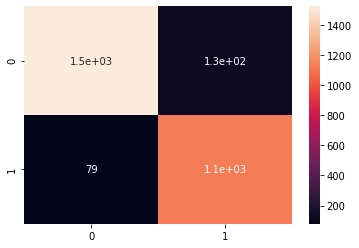

In [9]:
cm = confusion_matrix(y_test, pred)
sns.heatmap(cm, annot=True)
plt.plot()

------
## EfficientNetB3

<img src="https://user-images.githubusercontent.com/66634743/113626999-ec03a780-9673-11eb-9779-21d376f419d2.png" height=150 width=600>

### Loading data from pkl file


In [10]:
merged_features = utils.load_from_pkl(pkldest+"effnet_merged_features.pkl")
merged_labels = utils.load_from_pkl(pkldest+"merged_labels.pkl")

### PCA (k = 256)

In [11]:
pca = PCA(n_components=256)

pca.fit(merged_features)
PCA_features = pca.transform(merged_features)

print('Shape after PCA : ', PCA_features.shape)

Shape after PCA :  (9544, 256)


### SVM

In [12]:
merged_labels = merged_labels.reshape(merged_labels.shape[0])
X_train, X_test, y_train, y_test = train_test_split(PCA_features, merged_labels, test_size=0.3, random_state=42)

classifier = svm.SVC(kernel='rbf', probability=True)

classifier.fit(X_train, y_train)

SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='rbf',
    max_iter=-1, probability=True, random_state=None, shrinking=True, tol=0.001,
    verbose=False)

### Temp Results

In [13]:
pred = classifier.predict(X_test)

acc = np.sum(pred==y_test)/y_test.shape[0]
print("EffNetB3 + SVM  = ", acc*100)

EffNetB3 + SVM  =  96.29888268156425


### Prababilities of classes

In [14]:
effnet_probs = classifier.predict_proba(X_test)

print(effnet_probs.shape)

(2864, 2)


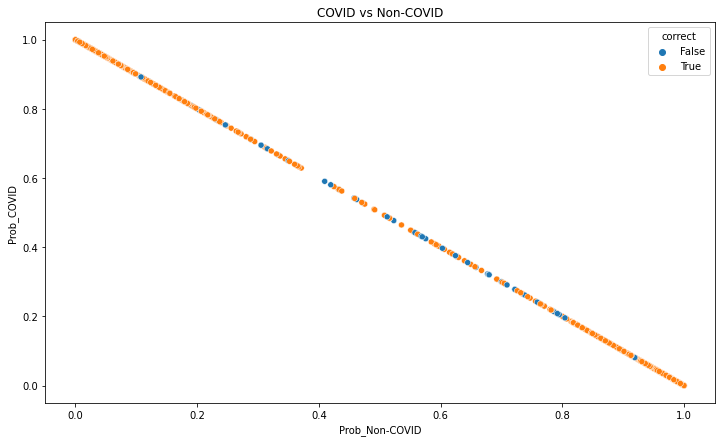

In [15]:
df = pd.DataFrame(effnet_probs, range(effnet_probs.shape[0]), ["Prob_Non-COVID", "Prob_COVID"])
df.insert(2, "prediction", pred, True)
df.insert(3, "actual", y_test, True)
df.insert(4, "correct", pred==y_test, True)

plt.figure(figsize=(12, 7))
sns.scatterplot(data=df, x="Prob_Non-COVID", y="Prob_COVID", hue="correct")
plt.title('COVID vs Non-COVID')
plt.show()

[]

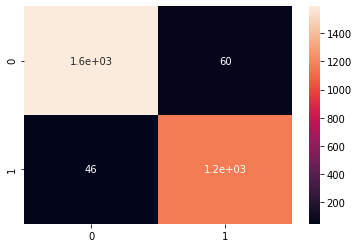

In [16]:
cm = confusion_matrix(y_test, pred)
sns.heatmap(cm, annot=True)
plt.plot()

------
## ResNet50

<img src="https://user-images.githubusercontent.com/66634743/113575413-dfa92b80-962e-11eb-902c-380e39b91234.png" height=150 width=600>

### Loading data from pkl



In [17]:
merged_features = utils.load_from_pkl(pkldest+"resnet_merged_features.pkl")

merged_labels = utils.load_from_pkl(pkldest+"merged_labels.pkl")

### PCA (k = 128)

In [18]:
k = 256

pca = PCA(n_components=k)

pca.fit(merged_features)
PCA_features = pca.transform(merged_features)

print("Shape after PCA ", PCA_features.shape)

Shape after PCA  (9544, 256)


### Classifier

In [19]:
merged_labels = merged_labels.reshape(merged_labels.shape[0])
X_train, X_test, y_train, y_test = train_test_split(PCA_features, merged_labels, test_size=0.3, random_state=42)

classifier = svm.SVC(kernel='rbf', probability=True)

classifier.fit(X_train, y_train)

SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='rbf',
    max_iter=-1, probability=True, random_state=None, shrinking=True, tol=0.001,
    verbose=False)

### Temporary Results

In [20]:
pred = classifier.predict(X_test)

acc = np.sum(pred==y_test)/y_test.shape[0]
print("ResNet50 + SVM  = ", acc*100)

ResNet50 + SVM  =  96.68296089385476


### Prababilities of classes

In [21]:
resnet_probs = classifier.predict_proba(X_test)

print(resnet_probs.shape)

(2864, 2)


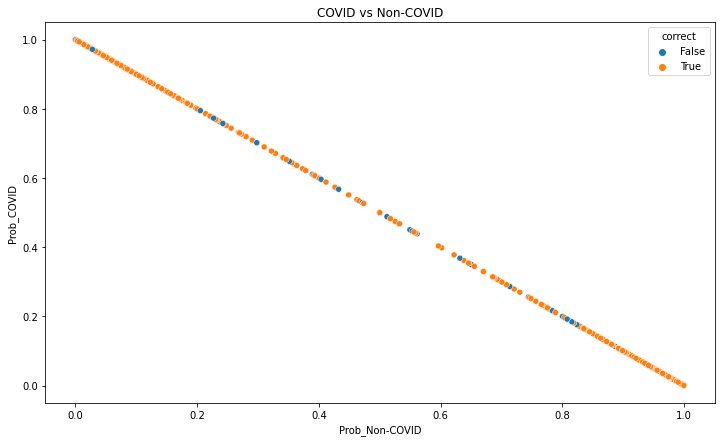

In [22]:
df = pd.DataFrame(resnet_probs, range(resnet_probs.shape[0]), ["Prob_Non-COVID", "Prob_COVID"])
df.insert(2, "prediction", pred, True)
df.insert(3, "actual", y_test, True)
df.insert(4, "correct", pred==y_test, True)

plt.figure(figsize=(12, 7))
sns.scatterplot(data=df, x="Prob_Non-COVID", y="Prob_COVID", hue="correct")
plt.title('COVID vs Non-COVID')
plt.show()

[]

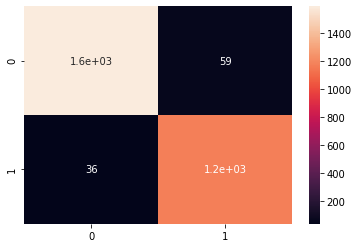

In [23]:
cm = confusion_matrix(y_test, pred)
sns.heatmap(cm, annot=True)
plt.plot()

------

## Fusion

<img src="https://user-images.githubusercontent.com/66634743/113895363-f770e300-97d9-11eb-9aba-dec98d34c9d5.png" height=300 width=180>


### Fusing the predictions of the 3 models

In [24]:
merged = (effnet_probs + resnet_probs + vgg16_probs)/3

merged_preds = np.argmax(merged, axis=1)

### Final Multi-Modality Model Result

In [27]:
final_acc = np.sum(y_test == merged_preds)/merged_preds.shape[0]

print("Multi-Modality Model : ", final_acc*100)

Multi-Modality Model :  96.71787709497207


### Confusion Matrix

[]

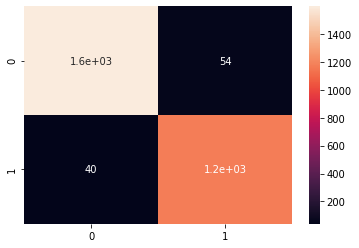

In [26]:
cm = confusion_matrix(y_test, merged_preds)
sns.heatmap(cm, annot=True)
plt.plot()